In [4]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [6]:
# Load the data
data = pd.read_csv('DATA\\ObesityDataSet_raw_and_data_sinthetic.csv', header=0) 
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
# Meaning of the features
dictionary = {
    "Column Name": ["Gender", "Age", "Height", "Weight", 
                    "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O",
                    "SCC", "FAF", "TUE", "CALC", "MTRANS", "NObeyesdad"
                    ],
    "Type": ["Feature, Categorical", "Feature, Continuous", "Feature, Continuous", 
             "Feature, Continuous", "Feature, Binary", "Feature, Binary", 
             "Feature, Integer", "Feature, Continuous", "Feature, Categorical", "Feature, Binary",
             "Feature, Continuous", "Feature, Binary", "Feature, Continuous", "Feature, Integer", 
             "Feature, Categorical", "Feature, Categorical", "Target, Categorical"],
    "Description": [
        "Gender",
        "Age",
        "Height",
        "Weight",
        "Has a family member suffered or suffers from overweight?",
        "Do you eat high caloric food frequently?",
        "Do you usually eat vegetables in your meals?",
        "How many main meals do you have daily?",
        "Do you eat any food between meals?",
        "Do you smoke?",
        "How much water do you drink daily?",
        "Do you monitor the calories you eat daily?",
        "How often do you have physical activity?",
        "How much time do you use technological devices such as cell phone, videogames, television, computer and others?",
        "How often do you drink alcohol?",
        "Which transportation do you usually use?",
        "Obesity level"
    ]
}
df_dict = pd.DataFrame(dictionary)
print(tabulate(df_dict, headers="keys"))

    Column Name                     Type                  Description
--  ------------------------------  --------------------  ---------------------------------------------------------------------------------------------------------------
 0  Gender                          Feature, Categorical  Gender
 1  Age                             Feature, Continuous   Age
 2  Height                          Feature, Continuous   Height
 3  Weight                          Feature, Continuous   Weight
 4  family_history_with_overweight  Feature, Binary       Has a family member suffered or suffers from overweight?
 5  FAVC                            Feature, Binary       Do you eat high caloric food frequently?
 6  FCVC                            Feature, Integer      Do you usually eat vegetables in your meals?
 7  NCP                             Feature, Continuous   How many main meals do you have daily?
 8  CAEC                            Feature, Categorical  Do you eat any food between mea

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [13]:
# Số lượng các giá trị khác nhau của các features
unique_values = data.nunique()
print(unique_values)

Age                               1402
Gender                               2
Height                            1574
Weight                            1525
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                635
SCC                                  2
SMOKE                                2
CH2O                              1268
family_history_with_overweight       2
FAF                               1190
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64


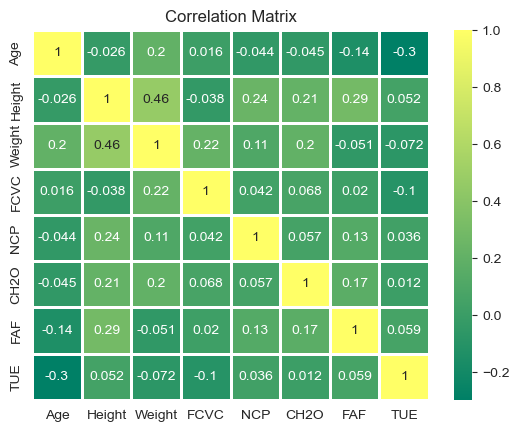

In [23]:
# Correlation matrix
numerical_df = data.select_dtypes(include=['float64'])
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap= 'summer', linewidths=2)
plt.title('Correlation Matrix')
plt.show()
